### APPROACH 1: Kaplan-Meier and Log-Rank Test

#### Step 1: Data Preparation

In [12]:
import pandas as pd
df_tcga_rna_seq_clinical = pd.read_csv('../PCA_Clustering_df.csv')

<ipython-input-12-bb2b43718ef7>:2: DtypeWarning: Columns (18,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tcga_rna_seq_clinical = pd.read_csv('../PCA_Clustering_df.csv')


In [14]:
df_tcga_rna_seq_clinical['Cluster'].head()

0    3
1    1
2    2
3    3
4    3
Name: Cluster, dtype: int64

In [15]:
df_cluster_0 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 0]
df_cluster_1 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 1]
df_cluster_2 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 2]
df_cluster_3 = df_tcga_rna_seq_clinical[df_tcga_rna_seq_clinical['Cluster'] == 3]

In [16]:
df_cluster_0.shape

(288, 60749)

In [17]:
df_cluster_1.shape

(155, 60749)

In [18]:
df_cluster_2.shape

(224, 60749)

In [19]:
df_cluster_3.shape

(426, 60749)

In [20]:
df_cluster_0['event_time'] = df_cluster_0.apply(
    lambda row: row['days_to_last_follow_up'] if row['vital_status'] == 'Alive' else row['days_to_death'],
    axis=1
)
df_cluster_0['event_observed'] = df_cluster_0['vital_status'].apply(lambda x: 0 if x == 'Dead' else 1)

<ipython-input-20-b78d0b1532d2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_0['event_time'] = df_cluster_0.apply(
<ipython-input-20-b78d0b1532d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_0['event_observed'] = df_cluster_0['vital_status'].apply(lambda x: 0 if x == 'Dead' else 1)


#### Step 2: Categorizing BCL9 Expression

In [21]:
Q1 = df_cluster_0['ENSG00000116128.11'].quantile(0.25)
Q3 = df_cluster_0['ENSG00000116128.11'].quantile(0.75)

# Classify patients based on BCL9 expression levels
df_cluster_0['BCL9_Group'] = 'Intermediate'  # Default to Intermediate
df_cluster_0.loc[df_cluster_0['ENSG00000116128.11'] <= Q1, 'BCL9_Group'] = 'Low'
df_cluster_0.loc[df_cluster_0['ENSG00000116128.11'] >= Q3, 'BCL9_Group'] = 'High'

<ipython-input-21-a82c2d95c24d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_0['BCL9_Group'] = 'Intermediate'  # Default to Intermediate


In [22]:
df_cluster_0.head()

,Unnamed: 0.1,Unnamed: 0,_id_x,patientID,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,...,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1,Cluster,event_time,event_observed,BCL9_Group
6,6,6,65325f20961444e8e0ce4aaf,A62V,TCGA-AC-A62V-01A-11R-A31O-07,TCGA-AC-A62V,TCGA-AC-A62V-01A,TP,Primary_Solid_Tumor,TCGA-AC-A62V-01A,...,-5.199338,-5.199338,-0.842694,-5.199338,0.195700,0.605955,0,348.0,0,Low
7,7,7,65325f20961444e8e0ce4ab0,A143,TCGA-D8-A143-01A-11R-A115-07,TCGA-D8-A143,TCGA-D8-A143-01A,TP,Primary_Solid_Tumor,TCGA-D8-A143-01A,...,-5.199338,-5.199338,-0.658043,-5.199338,1.031509,-1.831224,0,431.0,1,High
10,10,10,65325f21961444e8e0ce4ab3,A1XV,TCGA-D8-A1XV-01A-11R-A14M-07,TCGA-D8-A1XV,TCGA-D8-A1XV-01A,TP,Primary_Solid_Tumor,TCGA-D8-A1XV-01A,...,-5.199338,-5.199338,0.668987,-5.199338,-1.700222,-0.249721,0,461.0,1,Intermediate
17,17,17,65325f23961444e8e0ce4abd,A0AK,TCGA-AN-A0AK-01A-21R-A00Z-07,TCGA-AN-A0AK,TCGA-AN-A0AK-01A,TP,Solid,TCGA-AN-A0AK-01A,...,-5.199338,-5.199338,-0.070314,-5.199338,-5.199338,-0.030114,0,224.0,1,Intermediate
20,20,20,65325f23961444e8e0ce4ac0,A572,TCGA-E2-A572-01A-13R-A31O-07,TCGA-E2-A572,TCGA-E2-A572-01A,TP,Primary_Solid_Tumor,TCGA-E2-A572-01A,...,-5.199338,-5.199338,-1.389984,-5.199338,-1.315958,0.797044,0,1208.0,1,Low


In [23]:
df_cluster_0_bcl9_high = df_cluster_0[df_cluster_0['BCL9_Group'] == 'High']
df_cluster_0_bcl9_low = df_cluster_0[df_cluster_0['BCL9_Group'] == 'Low']

#### Step 3: Kaplan-Meier Survival Estimates

In [24]:
from lifelines import KaplanMeierFitter

# Create Kaplan-Meier objects
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

# Fit data
kmf_high.fit(durations=df_cluster_0_bcl9_high['event_time'], event_observed=df_cluster_0_bcl9_high['event_observed'])
kmf_low.fit(durations=df_cluster_0_bcl9_low['event_time'], event_observed=df_cluster_0_bcl9_low['event_observed'])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 72 total observations, 11 right-censored observations>

#### Step 4: Plotting Kaplan-Meier Curves

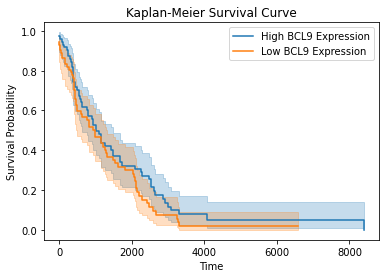

In [25]:
import matplotlib.pyplot as plt

kmf_high.plot(label='High BCL9 Expression')
kmf_low.plot(label='Low BCL9 Expression')

plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()

plt.show()

In [26]:
median_survival_high = kmf_high.median_survival_time_
median_survival_low = kmf_low.median_survival_time_
print(f"Median Survival Time - High BCL9 Expression: {median_survival_high}")
print(f"Median Survival Time - Low BCL9 Expression: {median_survival_low}")

Median Survival Time - High BCL9 Expression: 1025.0
Median Survival Time - Low BCL9 Expression: 974.0


#### Step 5: Log-Rank Test

In [27]:
from lifelines.statistics import logrank_test

results = logrank_test(durations_A=df_cluster_0_bcl9_high['event_time'], durations_B=df_cluster_0_bcl9_low['event_time'],
                       event_observed_A=df_cluster_0_bcl9_high['event_observed'], event_observed_B=df_cluster_0_bcl9_low['event_observed'])
print(results.summary) 

   test_statistic        p  -log2(p)
0         1.77593  0.18265  2.452847


### Approach 2: COX-PH Analysis

#### Step 1: Data Preparation

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cluster_0['gender'] = label_encoder.fit_transform(df_cluster_0['gender'])
df_cluster_0['paper_pathologic_stage'] = label_encoder.fit_transform(df_cluster_0['paper_pathologic_stage'])

In [ ]:

covariates = ['gender', 'paper_pathologic_stage', 'age_at_diagnosis']

df = df_cluster_0[covariates + ['event_time', 'event_observed', 'ENSG00000116128.11']]

In [ ]:
# Check for missing values in each column
print(df.isnull().sum())


In [ ]:
# Drop rows with any missing values across specified columns
df = df.dropna(subset=covariates + ['event_time', 'event_observed', 'ENSG00000116128.11'])

#### Step 2: Model Building

In [ ]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()


cph.fit(df, duration_col='event_time', event_col='event_observed', 
        formula='ENSG00000116128.11 + gender + paper_pathologic_stage + age_at_diagnosis')

print("Cox Proportional Hazards Model Summary:")
cph.print_summary()


In [ ]:
cph.plot()